<h2>DBMS Project Source Code Part 2<h2>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vaibh\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [35]:
data1= pd.read_csv("US_Accidents_March23.csv")

In [39]:
pd.set_option('display.max_columns',None)
data1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [41]:
# To know percentage of missing values in each column
df_raw_missing_percentage = data1.isnull().sum().sort_values(ascending = False)/ len(data1)*100

In [42]:
df_raw_missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

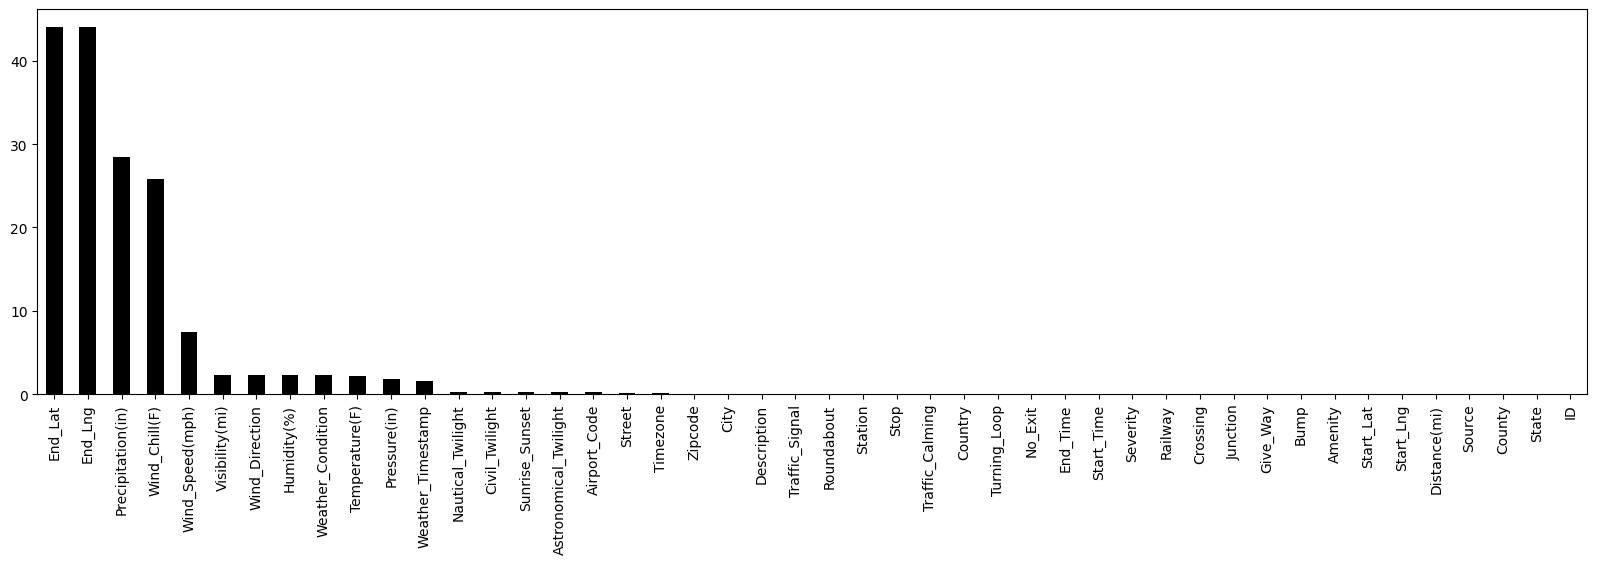

In [43]:
# TO visualize the missing data of each column
plt.figure(figsize=(20, 5))

df_raw_missing_percentage.plot(kind = "bar", color = "k")
plt.show()

In [45]:
proportions_weather = data1["Weather_Condition"].value_counts(normalize=True)

def impute_weather_condition(row):
    if pd.isna(row["Weather_Condition"]):
        return np.random.choice(proportions_weather.index, p=proportions_weather)
    else:
        return row["Weather_Condition"]

data1["Weather_Condition"] = data1.apply(impute_weather_condition, axis=1)


In [46]:
data1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [47]:
data1 = data1.dropna(subset="City")


In [48]:
data1["Temperature(F)"].fillna(data1["Temperature(F)"].mean(), inplace=True)


In [49]:
data1.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081

In [51]:
del data1['Country']

In [55]:
data1.head(200)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A-196,2,2016-02-16 10:03:00,2016-02-16 13:00:00,40.051949,-83.032806,NaN,NaN,0.01,Lane blocked on exit ramp due to accident on O...,W Henderson Rd,Columbus,Franklin,OH,43214,US/Eastern,KOSU,2016-02-16 10:00:00,33.1,24.9,92.0,29.77,2.5,WNW,10.4,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
196,A-197,2,2016-02-16 10:58:52,2016-02-16 11:28:52,39.772823,-84.135612,NaN,NaN,0.00,Accident on Radio Rd at Smithville Rd. Expect ...,Radio Rd,Dayton,Greene,OH,45431-1035,US/Eastern,KFFO,2016-02-16 10:58:00,31.1,25.4,88.0,29.86,6.0,WNW,5.8,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
197,A-198,2,2016-02-16 11:12:18,2016-02-16 11:42:18,39.673203,-84.221886,NaN,NaN,0.01,Accident on Alex Bell Rd at OH-741 Springboro ...,Springboro Pike,Dayton,Montgomery,OH,45449-2808,US/Eastern,KMGY,2016-02-16 11:29:00,30.9,22.8,76.0,29.81,6.0,WNW,9.2,NaN,Haze,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
198,A-199,2,2016-02-16 11:11:35,2016-02-16 11:41:35,39.762440,-84.205070,NaN,NaN,0.01,Accident on Riverview Ave at Salem Ave. Expect...,Salem Ave,Dayton,Montgomery,OH,45406,US/Eastern,KDAY,2016-02-16 11:06:00,30.0,24.1,92.0,29.82,1.8,NW,5.8,0.00,Light Snow,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [54]:
del data1['Source']

In [65]:
df.head(20)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 08:28:00,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,False,False,False,False,False,False

In [56]:
data1['Turning_Loop']

0          False
1          False
2          False
3          False
4          False
           ...  
7728389    False
7728390    False
7728391    False
7728392    False
7728393    False
Name: Turning_Loop, Length: 7728141, dtype: bool

In [57]:
data1.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [59]:
data1['Start_Time']=pd.to_datetime(data1['Start_Time'],format='ISO8601')
data1['End_Time']=pd.to_datetime(data1['End_Time'],format='ISO8601')
data1.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [60]:
data1['elapsed_time'] = data1['End_Time'] - data1['Start_Time']
data1['elapsed_time'] = data1['elapsed_time']/np.timedelta64(1,'m')
data1.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314.0
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30.0
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30.0
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30.0
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30.0


In [71]:
data1 = data1.drop(data1.loc[data1.elapsed_time<0].index)


In [72]:
data1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314.0
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30.0
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30.0
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30.0
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30.0


In [62]:
data1['day_of_week']=data1['Start_Time'].dt.weekday
data1['hour_of_day']=data1['Start_Time'].dt.hour
data1['month_of_year']=data1['Start_Time'].dt.month


In [64]:
data1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30.0,0,7,2


In [65]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 48 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      object        
 18  Temperature(F)         floa

In [66]:
#df.Turning_Loop.unique()
data1.Roundabout.unique()


array([False,  True])

In [67]:
del data1['Turning_Loop']

In [69]:
data1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'elapsed_time', 'day_of_week', 'hour_of_day', 'month_of_year'],
      dtype='object')

In [70]:
del data1['Railway']

In [72]:
data1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'elapsed_time',
       'day_of_week', 'hour_of_day', 'month_of_year'],
      dtype='object')

In [73]:
data1['Roundabout'].value_counts()


Roundabout
False    7727892
True         249
Name: count, dtype: int64

In [74]:
del data1['Roundabout']

In [75]:
data1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'elapsed_time',
       'day_of_week', 'hour_of_day', 'month_of_year'],
      dtype='object')

In [76]:
data1['No_Exit'].value_counts(normalize=True).mul(100).astype(str)+'%'


No_Exit
False     99.74709312368913%
True     0.2529068763108748%
Name: proportion, dtype: object

In [77]:
del data1['Traffic_Calming']

In [78]:
data1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,30.0,0,7,2


In [79]:
data1['No_Exit'].value_counts(normalize=True).mul(100).astype(str)+'%'


No_Exit
False     99.74709312368913%
True     0.2529068763108748%
Name: proportion, dtype: object

In [80]:
del data1['No_Exit']

In [81]:
data1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'Station', 'Stop', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'elapsed_time', 'day_of_week', 'hour_of_day',
       'month_of_year'],
      dtype='object')

In [82]:
data1['Give_Way'].value_counts(normalize=True).mul(100).astype(str)+'%'


Give_Way
False      99.52663907141445%
True     0.47336092858554213%
Name: proportion, dtype: object

In [83]:
del data1['Give_Way']

In [84]:
data1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'elapsed_time', 'day_of_week', 'hour_of_day', 'month_of_year'],
      dtype='object')

In [95]:
data1['Bump'].value_counts(normalize=True).mul(100).astype(str)+'%'


Bump
False        99.9545298151263%
True     0.045470184873697306%
Name: proportion, dtype: object

In [86]:
del data1['Bump']

In [85]:

data1['Weather_Timestamp']=pd.to_datetime(data1['Weather_Timestamp'],format='ISO8601')


In [87]:
data1.head()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 41 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)         floa

In [88]:
data1['Airport_Code'].value_counts(normalize=True).mul(100).astype(str)+'%'


Airport_Code
KCQT        1.535680710473599%
KRDU        1.392082131379268%
KMCJ        1.320951194911484%
KBNA       1.2838348879788328%
KCLT        1.262382700790136%
                 ...          
KP58    1.297772969673122e-05%
KWRL    1.297772969673122e-05%
KMRH    1.297772969673122e-05%
K7R5    1.297772969673122e-05%
KICR    1.297772969673122e-05%
Name: proportion, Length: 2045, dtype: object

In [89]:
data1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Crossing',
       'Junction', 'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'elapsed_time', 'day_of_week', 'hour_of_day', 'month_of_year'],
      dtype='object')

In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 41 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)         floa

In [93]:
del data1['Station']

In [95]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)         floa

In [96]:
del data1['Junction']

In [97]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 39 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)         floa

In [98]:
data1['Civil_Twilight'].value_counts(normalize=True).mul(100).astype(str)+'%'


Civil_Twilight
Day       73.91965735116315%
Night    26.080342648836858%
Name: proportion, dtype: object

In [99]:
del data1['Amenity']

In [100]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 38 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Street                 object        
 11  City                   object        
 12  County                 object        
 13  State                  object        
 14  Zipcode                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)         floa

In [101]:
data1['Humidity(%)'].value_counts(normalize=True).mul(100).astype(str)+'%'


Humidity(%)
93.0        3.8434054310799945%
100.0        3.794927829003003%
87.0        2.2448624596968707%
90.0          2.20395700081705%
89.0        1.8611189509563406%
                  ...          
5.0        0.05444794575168348%
4.0       0.028686773266204252%
3.0       0.008869468430252355%
2.0      0.0025019843780861115%
1.0      0.0006486626165408437%
Name: proportion, Length: 100, dtype: object

In [103]:
data1.head(20)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,Night,Night,Night,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,Night,Night,Night,Day,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,True,Night,Night,Day,Day,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,Night,Day,Day,Day,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,True,Day,Day,Day,Day,30.0,0,7,2
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,Day,Day,Day,Day,30.0,0,7,2
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,Day,Day,Day,Day,30.0,0,7,2
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,Day,Day,Day,Day,30.0,0,7,2
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy,False,False,False,Day,Day,Day,Day,30.0,0,8,2
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 08:28:00,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,False,False,False,Day,Day,Day,Day,30.0,0,8,2


In [104]:
del data1['Civil_Twilight']

In [105]:
del data1['Nautical_Twilight']

In [106]:
del data1['Astronomical_Twilight']

In [107]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 35 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   End_Lat            float64       
 7   End_Lng            float64       
 8   Distance(mi)       float64       
 9   Description        object        
 10  Street             object        
 11  City               object        
 12  County             object        
 13  State              object        
 14  Zipcode            object        
 15  Timezone           object        
 16  Airport_Code       object        
 17  Weather_Timestamp  datetime64[ns]
 18  Temperature(F)     float64       
 19  Wind_Chill(F)      float64       
 20  Humidity(%)        float64   

In [108]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 35 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   End_Lat            float64       
 7   End_Lng            float64       
 8   Distance(mi)       float64       
 9   Description        object        
 10  Street             object        
 11  City               object        
 12  County             object        
 13  State              object        
 14  Zipcode            object        
 15  Timezone           object        
 16  Airport_Code       object        
 17  Weather_Timestamp  datetime64[ns]
 18  Temperature(F)     float64       
 19  Wind_Chill(F)      float64       
 20  Humidity(%)        float64   

In [109]:
data1.head(30)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Stop,Traffic_Signal,Sunrise_Sunset,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,Night,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,True,Night,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,Night,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,True,Day,30.0,0,7,2
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,Day,30.0,0,7,2
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,Day,30.0,0,7,2
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,Day,30.0,0,7,2
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy,False,False,False,Day,30.0,0,8,2
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 08:28:00,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain,False,False,False,Day,30.0,0,8,2


In [110]:
data1['Severity'].value_counts(normalize=True).mul(100).astype(str)+'%'


Severity
2     79.66681767322828%
3    16.812892000805885%
4    2.6486317990316173%
1    0.8716585269342264%
Name: proportion, dtype: object

In [136]:
data1['Wind_Speed(mph)'].value_counts(normalize=True).mul(100).astype(str)+'%'


Wind_Speed(mph)
0.0          13.436007782672027%
5.0            7.47334923867443%
6.0           7.226329743570038%
3.0           7.183294501479337%
7.0            6.71925442840326%
                  ...           
85.2     1.3972481198279988e-05%
471.8    1.3972481198279988e-05%
190.0    1.3972481198279988e-05%
76.0     1.3972481198279988e-05%
135.8    1.3972481198279988e-05%
Name: proportion, Length: 184, dtype: object

In [111]:
data1['Wind_Speed(mph)'].value_counts()

Wind_Speed(mph)
0.0      961605
5.0      534862
6.0      517183
3.0      514103
7.0      480892
          ...  
85.2          1
471.8         1
190.0         1
76.0          1
135.8         1
Name: count, Length: 184, dtype: int64

In [112]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402700
End_Lng              3402700
Distance(mi)               0
Description                5
Street                 10869
City                       0
County                     0
State                      0
Zipcode                 1913
Timezone                7806
Airport_Code           22633
Weather_Timestamp     120224
Temperature(F)             0
Wind_Chill(F)        1998957
Humidity(%)           174137
Pressure(in)          140671
Visibility(mi)        177089
Wind_Direction        175202
Wind_Speed(mph)       571216
Precipitation(in)    2203529
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset         22993
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year 

In [113]:
np.where(data1['Sunrise_Sunset'].isnull())[0]

array([ 512215,  512276,  512288, ..., 7635897, 7639085, 7663860],
      dtype=int64)

In [114]:
data1.dropna(subset=['Sunrise_Sunset'])

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Stop,Traffic_Signal,Sunrise_Sunset,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,Night,314.000000,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,Night,30.000000,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,True,Night,30.000000,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,Night,30.000000,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,True,Day,30.000000,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,Day,28.600000,4,18,8
7728390,A-7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,Day,26.883333,4,19,8
7728391,A-7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,Day,28.466667,4,19,8
7728392,A-7777760,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,Day,29.350000,4,19,8


In [115]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402700
End_Lng              3402700
Distance(mi)               0
Description                5
Street                 10869
City                       0
County                     0
State                      0
Zipcode                 1913
Timezone                7806
Airport_Code           22633
Weather_Timestamp     120224
Temperature(F)             0
Wind_Chill(F)        1998957
Humidity(%)           174137
Pressure(in)          140671
Visibility(mi)        177089
Wind_Direction        175202
Wind_Speed(mph)       571216
Precipitation(in)    2203529
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset         22993
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year 

In [155]:
data1=data1.dropna(subset=['Sunrise_Sunset'])

In [117]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402700
End_Lng              3402700
Distance(mi)               0
Description                5
Street                 10869
City                       0
County                     0
State                      0
Zipcode                 1913
Timezone                7806
Airport_Code           22633
Weather_Timestamp     120224
Temperature(F)             0
Wind_Chill(F)        1998957
Humidity(%)           174137
Pressure(in)          140671
Visibility(mi)        177089
Wind_Direction        175202
Wind_Speed(mph)       571216
Precipitation(in)    2203529
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset         22993
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year 

In [152]:
data1=data1.dropna(subset=['Description','Zipcode','Zipcode','Airport_Code'])

In [119]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402700
End_Lng              3402700
Distance(mi)               0
Description                5
Street                 10869
City                       0
County                     0
State                      0
Zipcode                 1913
Timezone                7806
Airport_Code           22633
Weather_Timestamp     120224
Temperature(F)             0
Wind_Chill(F)        1998957
Humidity(%)           174137
Pressure(in)          140671
Visibility(mi)        177089
Wind_Direction        175202
Wind_Speed(mph)       571216
Precipitation(in)    2203529
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset         22993
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year 

In [150]:
data1=data1.dropna(subset=['Street'])

In [93]:
data1.isnull().sum()

Severity                0
Start_Time              0
End_Time                0
Distance(mi)            0
Description             0
Street                  0
City                    0
County                  0
State                   0
Zipcode                 0
Timezone                0
Airport_Code            0
Temperature(F)          0
Humidity(%)        150862
Pressure(in)       117536
Visibility(mi)     153799
Wind_Direction     151844
Wind_Speed(mph)    547854
Crossing                0
Stop                    0
Traffic_Signal          0
Sunrise_Sunset          0
elapsed_time            0
day_of_week             0
hour_of_day             0
month_of_year           0
dtype: int64

Text(0, 0.5, 'Frequency')

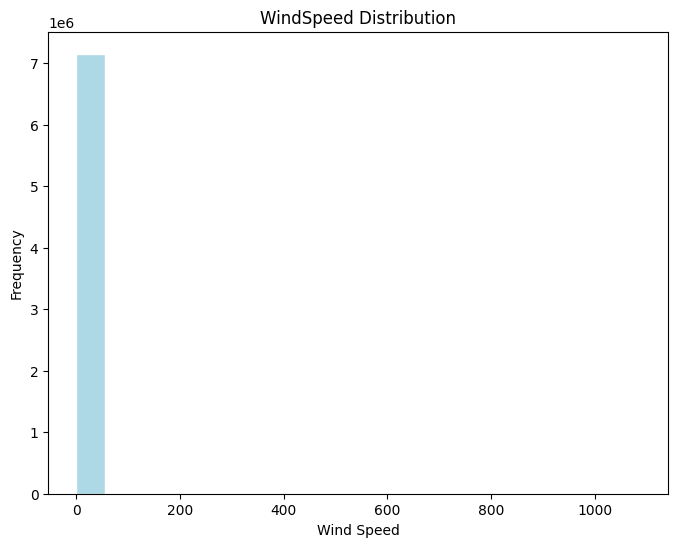

In [120]:
plt.figure(figsize=(8, 6))
plt.hist(data1['Wind_Speed(mph)'], bins=20, color='lightblue', edgecolor='white')
plt.title('WindSpeed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

In [121]:
median_val=data1['Wind_Speed(mph)'].median()

In [122]:
median_val

7.0

In [123]:
data1['Wind_Speed(mph)'].fillna(median_val, inplace=True)

In [125]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402700
End_Lng              3402700
Distance(mi)               0
Description                5
Street                 10869
City                       0
County                     0
State                      0
Zipcode                 1913
Timezone                7806
Airport_Code           22633
Weather_Timestamp     120224
Temperature(F)             0
Wind_Chill(F)        1998957
Humidity(%)           174137
Pressure(in)          140671
Visibility(mi)        177089
Wind_Direction        175202
Wind_Speed(mph)            0
Precipitation(in)    2203529
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset         22993
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year 

Text(0, 0.5, 'Frequency')

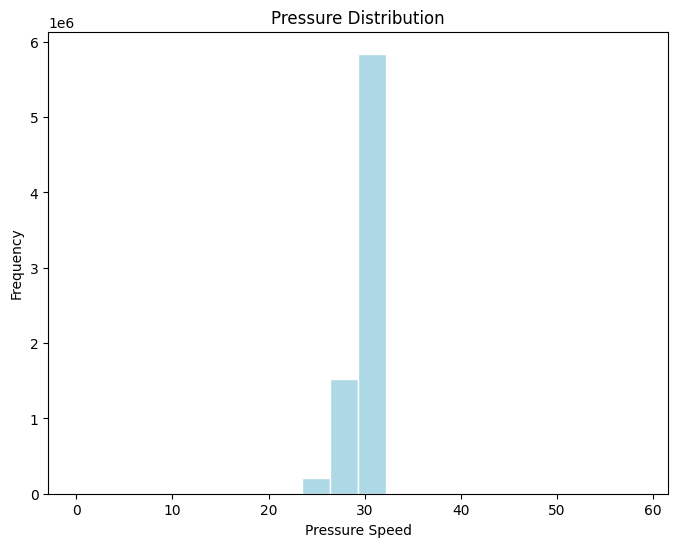

In [126]:
plt.figure(figsize=(8, 6))
plt.hist(data1['Pressure(in)'], bins=20, color='lightblue', edgecolor='white')
plt.title('Pressure Distribution')
plt.xlabel('Pressure Speed')
plt.ylabel('Frequency')

In [128]:
median_val_p=data1['Pressure(in)'].median()
median_val_p

29.86

In [129]:
data1['Pressure(in)'].fillna(median_val_p, inplace=True)

data1['Pressure(in)'].isnull().sum()

0

Text(0, 0.5, 'Frequency')

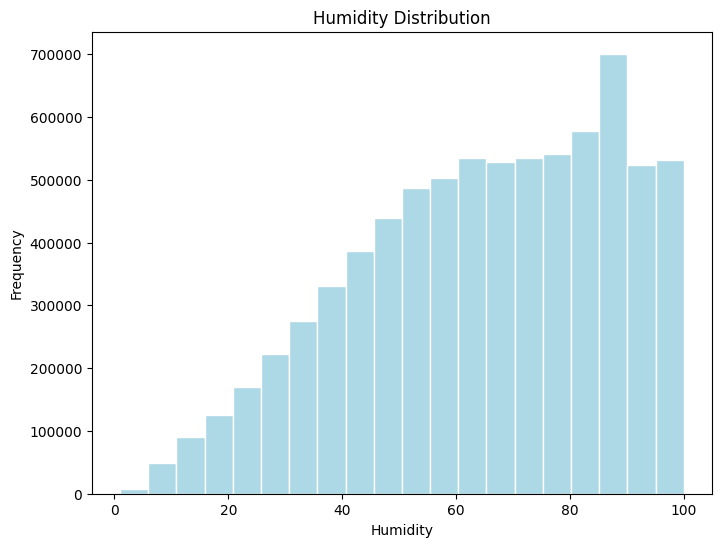

In [130]:
plt.figure(figsize=(8, 6))
plt.hist(data1['Humidity(%)'], bins=20, color='lightblue', edgecolor='white')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

In [131]:
median_val_h=data1['Humidity(%)'].median()
median_val_h

67.0

In [132]:
data1['Humidity(%)'].fillna(median_val_h, inplace=True)

data1['Humidity(%)'].isnull().sum()

0

Text(0, 0.5, 'Frequency')

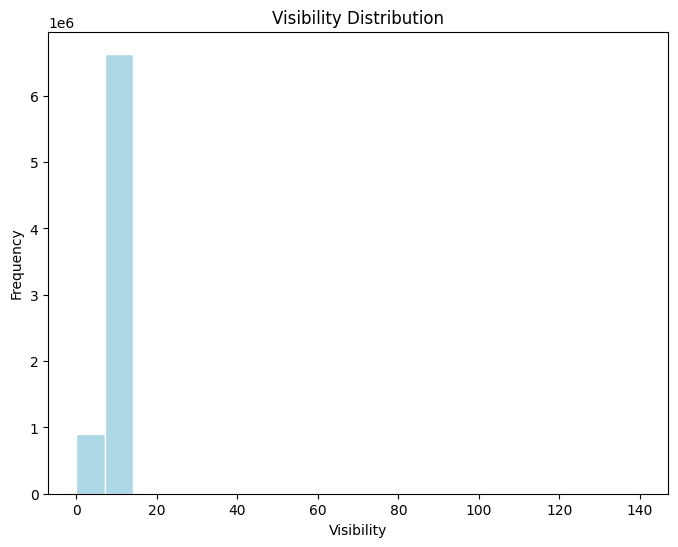

In [133]:
plt.figure(figsize=(8, 6))
plt.hist(data1['Visibility(mi)'], bins=20, color='lightblue', edgecolor='white')
plt.title('Visibility Distribution')
plt.xlabel('Visibility')
plt.ylabel('Frequency')

In [134]:
median_val_v=data1['Visibility(mi)'].median()
median_val_v

10.0

In [135]:
data1['Visibility(mi)'].fillna(median_val_v, inplace=True)

data1['Visibility(mi)'].isnull().sum()

0

In [136]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3402700
End_Lng              3402700
Distance(mi)               0
Description                5
Street                 10869
City                       0
County                     0
State                      0
Zipcode                 1913
Timezone                7806
Airport_Code           22633
Weather_Timestamp     120224
Temperature(F)             0
Wind_Chill(F)        1998957
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Direction        175202
Wind_Speed(mph)            0
Precipitation(in)    2203529
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset         22993
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year 

In [137]:
del data1['Wind_Direction']

In [139]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7728141 entries, 0 to 7728393
Data columns (total 34 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   End_Time           datetime64[ns]
 4   Start_Lat          float64       
 5   Start_Lng          float64       
 6   End_Lat            float64       
 7   End_Lng            float64       
 8   Distance(mi)       float64       
 9   Description        object        
 10  Street             object        
 11  City               object        
 12  County             object        
 13  State              object        
 14  Zipcode            object        
 15  Timezone           object        
 16  Airport_Code       object        
 17  Weather_Timestamp  datetime64[ns]
 18  Temperature(F)     float64       
 19  Wind_Chill(F)      float64       
 20  Humidity(%)        float64   

In [157]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3392946
End_Lng              3392946
Distance(mi)               0
Description                0
Street                     0
City                       0
County                     0
State                      0
Zipcode                    0
Timezone                   0
Airport_Code               0
Weather_Timestamp      97234
Temperature(F)             0
Wind_Chill(F)        1975424
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Speed(mph)            0
Precipitation(in)          0
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset             0
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year              0
dtype: int64

In [141]:
data1.value_counts().sum()

3581725

In [142]:
data1.head(30)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Stop,Traffic_Signal,Sunrise_Sunset,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,7.0,0.02,Light Rain,False,False,False,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,7.0,0.00,Light Rain,False,False,False,Night,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,3.5,NaN,Overcast,False,False,True,Night,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,4.6,NaN,Mostly Cloudy,False,False,False,Night,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,3.5,NaN,Mostly Cloudy,False,False,True,Day,30.0,0,7,2
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,3.5,0.03,Light Rain,False,False,False,Day,30.0,0,7,2
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,3.5,NaN,Overcast,False,False,False,Day,30.0,0,7,2
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,3.5,NaN,Overcast,False,False,False,Day,30.0,0,7,2
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,1.2,NaN,Mostly Cloudy,False,False,False,Day,30.0,0,8,2
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 08:28:00,37.4,33.8,100.0,29.62,3.0,4.6,0.02,Light Rain,False,False,False,Day,30.0,0,8,2


In [158]:
median_val_wc=data1['Wind_Chill(F)'].median()
median_val_wc

62.0

In [159]:
data1['Wind_Chill(F)'].fillna(median_val_wc, inplace=True)

data1['Wind_Chill(F)'].isnull().sum()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_17300\1869142973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Wind_Chill(F)'].fillna(median_val_wc, inplace=True)


0

In [160]:
median_val_Pre=data1['Precipitation(in)'].median()
median_val_Pre

0.0

In [145]:
data1['Precipitation(in)'].fillna(median_val_Pre, inplace=True)

data1['Precipitation(in)'].isnull().sum()

0

In [146]:
data1.value_counts().sum()

3760841

In [162]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3392946
End_Lng              3392946
Distance(mi)               0
Description                0
Street                     0
City                       0
County                     0
State                      0
Zipcode                    0
Timezone                   0
Airport_Code               0
Weather_Timestamp      97234
Temperature(F)             0
Wind_Chill(F)              0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Speed(mph)            0
Precipitation(in)          0
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset             0
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year              0
dtype: int64

In [148]:
data1.head(200)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Stop,Traffic_Signal,Sunrise_Sunset,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,7.0,0.02,Light Rain,False,False,False,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,7.0,0.00,Light Rain,False,False,False,Night,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,3.5,0.00,Overcast,False,False,True,Night,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,4.6,0.00,Mostly Cloudy,False,False,False,Night,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,3.5,0.00,Mostly Cloudy,False,False,True,Day,30.0,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,A-196,2,2016-02-16 10:03:00,2016-02-16 13:00:00,40.051949,-83.032806,NaN,NaN,0.01,Lane blocked on exit ramp due to accident on O...,W Henderson Rd,Columbus,Franklin,OH,43214,US/Eastern,KOSU,2016-02-16 10:00:00,33.1,24.9,92.0,29.77,2.5,10.4,0.00,Overcast,False,False,False,Day,177.0,1,10,2
196,A-197,2,2016-02-16 10:58:52,2016-02-16 11:28:52,39.772823,-84.135612,NaN,NaN,0.00,Accident on Radio Rd at Smithville Rd. Expect ...,Radio Rd,Dayton,Greene,OH,45431-1035,US/Eastern,KFFO,2016-02-16 10:58:00,31.1,25.4,88.0,29.86,6.0,5.8,0.00,Overcast,False,False,False,Day,30.0,1,10,2
197,A-198,2,2016-02-16 11:12:18,2016-02-16 11:42:18,39.673203,-84.221886,NaN,NaN,0.01,Accident on Alex Bell Rd at OH-741 Springboro ...,Springboro Pike,Dayton,Montgomery,OH,45449-2808,US/Eastern,KMGY,2016-02-16 11:29:00,30.9,22.8,76.0,29.81,6.0,9.2,0.00,Haze,False,False,True,Day,30.0,1,11,2
198,A-199,2,2016-02-16 11:11:35,2016-02-16 11:41:35,39.762440,-84.205070,NaN,NaN,0.01,Accident on Riverview Ave at Salem Ave. Expect...,Salem Ave,Dayton,Montgomery,OH,45406,US/Eastern,KDAY,2016-02-16 11:06:00,30.0,24.1,92.0,29.82,1.8,5.8,0.00,Light Snow,True,False,True,Day,30.0,1,11,2


In [163]:
data1=data1.dropna(subset=['Weather_Timestamp'])

In [164]:
data1.isnull().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat              3359142
End_Lng              3359142
Distance(mi)               0
Description                0
Street                     0
City                       0
County                     0
State                      0
Zipcode                    0
Timezone                   0
Airport_Code               0
Weather_Timestamp          0
Temperature(F)             0
Wind_Chill(F)              0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Speed(mph)            0
Precipitation(in)          0
Weather_Condition          0
Crossing                   0
Stop                       0
Traffic_Signal             0
Sunrise_Sunset             0
elapsed_time               0
day_of_week                0
hour_of_day                0
month_of_year              0
dtype: int64

In [165]:
data1.head(20)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Crossing,Stop,Traffic_Signal,Sunrise_Sunset,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,62.0,91.0,29.68,10.0,7.0,0.02,Light Rain,False,False,False,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,62.0,100.0,29.65,10.0,7.0,0.00,Light Rain,False,False,False,Night,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,3.5,0.00,Overcast,False,False,True,Night,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,4.6,0.00,Mostly Cloudy,False,False,False,Night,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,3.5,0.00,Mostly Cloudy,False,False,True,Day,30.0,0,7,2
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,3.5,0.03,Light Rain,False,False,False,Day,30.0,0,7,2
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,3.5,0.00,Overcast,False,False,False,Day,30.0,0,7,2
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,3.5,0.00,Overcast,False,False,False,Day,30.0,0,7,2
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,62.0,99.0,29.67,5.0,1.2,0.00,Mostly Cloudy,False,False,False,Day,30.0,0,8,2
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,2016-02-08 08:28:00,37.4,33.8,100.0,29.62,3.0,4.6,0.02,Light Rain,False,False,False,Day,30.0,0,8,2


In [166]:
data1.to_csv('cleanedd_us_acc_data.csv', index=False)


In [180]:
#df.to_csv('cleaned_us_acc_data.csv', index=False)


In [1]:
df3=pd.read_csv('cleaned_us_acc_data.csv')

<IPython.core.display.Javascript object>

In [2]:
df3.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Wind_Speed(mph),Precipitation(in),Crossing,Stop,Traffic_Signal,Sunrise_Sunset,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,...,7.0,0.02,False,False,False,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,7.0,0.00,False,False,False,Night,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,3.5,0.00,False,False,True,Night,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,4.6,0.00,False,False,False,Night,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,3.5,0.00,False,False,True,Day,30.0,0,7,2


In [4]:
severity_count_dim = df3[['Severity']].drop_duplicates().reset_index(drop=True)
severity_count_dim['Severity_count_id'] = severity_count_dim.index
severity_count_dim = severity_count_dim[['Severity_count_id','Severity']]

In [5]:
severity_count_dim

,Severity_count_id,Severity
0,0,3
1,1,2
2,2,1
3,3,4


In [6]:
start_time_count_dim = df3[['Start_Time']].drop_duplicates().reset_index(drop=True)
start_time_count_dim['Start_Time_count_id'] = start_time_count_dim.index
start_time_count_dim = start_time_count_dim[['Start_Time_count_id','Start_Time']]

In [7]:
start_time_count_dim

,Start_Time_count_id,Start_Time
0,0,2016-02-08 05:46:00
1,1,2016-02-08 06:07:59
2,2,2016-02-08 06:49:27
3,3,2016-02-08 07:23:34
4,4,2016-02-08 07:39:07
...,...,...
5772640,5772640,2019-08-23 18:30:23
5772641,5772641,2019-08-23 18:03:25
5772642,5772642,2019-08-23 19:11:30
5772643,5772643,2019-08-23 19:00:21


In [11]:
end_time_count_dim = df3[['End_Time']].drop_duplicates().reset_index(drop=True)
end_time_count_dim['End_Time_count_id'] = end_time_count_dim.index
end_time_count_dim = end_time_count_dim[['End_Time_count_id','End_Time']]

In [12]:
end_time_count_dim

,End_Time_count_id,End_Time
0,0,2016-02-08 11:00:00
1,1,2016-02-08 06:37:59
2,2,2016-02-08 07:19:27
3,3,2016-02-08 07:53:34
4,4,2016-02-08 08:09:07
...,...,...
6428210,6428210,2019-08-23 18:32:01
6428211,6428211,2019-08-23 19:38:23
6428212,6428212,2019-08-23 19:28:49
6428213,6428213,2019-08-23 19:29:42


In [13]:
distance_count_dim = df3[['Distance(mi)']].drop_duplicates().reset_index(drop=True)
distance_count_dim['Distance_count_id'] = distance_count_dim.index
distance_count_dim = distance_count_dim[['Distance_count_id','Distance(mi)']]

In [14]:
distance_count_dim

,Distance_count_id,Distance(mi)
0,0,0.010
1,1,0.000
2,2,1.320
3,3,1.090
4,4,1.280
...,...,...
22282,22282,35.943
22283,22283,27.238
22284,22284,11.622
22285,22285,20.246


In [15]:
temperature_count_dim = df3[['Temperature(F)']].drop_duplicates().reset_index(drop=True)
temperature_count_dim['Distance_count_id'] = temperature_count_dim.index
temperature_count_dim = temperature_count_dim[['Distance_count_id','Temperature(F)']]

In [16]:
temperature_count_dim

,Distance_count_id,Temperature(F)
0,0,36.9
1,1,37.9
2,2,36.0
3,3,35.1
4,4,34.0
...,...,...
856,856,-13.5
857,857,-17.9
858,858,168.8
859,859,-12.1


In [17]:
humidity_count_dim = df3[['Humidity(%)']].drop_duplicates().reset_index(drop=True)
humidity_count_dim['Humidity_count_id'] = humidity_count_dim.index
humidity_count_dim = humidity_count_dim[['Humidity_count_id','Humidity(%)']]

In [18]:
humidity_count_dim

,Humidity_count_id,Humidity(%)
0,0,91.0
1,1,100.0
2,2,96.0
3,3,89.0
4,4,97.0
...,...,...
95,95,6.0
96,96,5.0
97,97,1.0
98,98,2.0


In [19]:
pressure_count_dim = df3[['Pressure(in)']].drop_duplicates().reset_index(drop=True)
pressure_count_dim['Pressure_count_id'] = pressure_count_dim.index
pressure_count_dim = pressure_count_dim[['Pressure_count_id','Pressure(in)']]

In [20]:
pressure_count_dim

,Pressure_count_id,Pressure(in)
0,0,29.68
1,1,29.65
2,2,29.67
3,3,29.64
4,4,29.63
...,...,...
1139,1139,19.48
1140,1140,21.16
1141,1141,31.13
1142,1142,31.06


In [21]:
visibility_count_dim = df3[['Visibility(mi)']].drop_duplicates().reset_index(drop=True)
visibility_count_dim['Visibility_count_id'] = visibility_count_dim.index
visibility_count_dim = visibility_count_dim[['Visibility_count_id','Visibility(mi)']]

In [24]:
visibility_count_dim

,Visibility_count_id,Visibility(mi)
0,0,10.0
1,1,9.0
2,2,6.0
3,3,7.0
4,4,5.0
...,...,...
87,87,22.0
88,88,110.0
89,89,130.0
90,90,63.0


In [26]:
wind_speed_count_dim = df3[['Wind_Speed(mph)']].drop_duplicates().reset_index(drop=True)
wind_speed_count_dim['Wind_Speed_count_id'] = wind_speed_count_dim.index
wind_speed_count_dim = wind_speed_count_dim[['Wind_Speed_count_id','Wind_Speed(mph)']]

In [27]:
wind_speed_count_dim

,Wind_Speed_count_id,Wind_Speed(mph)
0,0,7.0
1,1,3.5
2,2,4.6
3,3,1.2
4,4,5.8
...,...,...
179,179,114.0
180,180,99.0
181,181,245.1
182,182,141.5


In [28]:
precipitation_count_dim = df3[['Precipitation(in)']].drop_duplicates().reset_index(drop=True)
precipitation_count_dim['Precipitation_count_id'] = precipitation_count_dim.index
precipitation_count_dim = precipitation_count_dim[['Precipitation_count_id','Precipitation(in)']]

In [29]:
precipitation_count_dim

,Precipitation_count_id,Precipitation(in)
0,0,0.02
1,1,0.00
2,2,0.03
3,3,0.01
4,4,0.07
...,...,...
294,294,24.00
295,295,8.80
296,296,1.97
297,297,2.27


In [30]:
Facebook-Page-1.jpg

SyntaxError: invalid syntax (226513588.py, line 1)

In [38]:
pd.set_option('display.max_columns',None)
df3.head(40)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Crossing,Stop,Traffic_Signal,Sunrise_Sunset,elapsed_time,day_of_week,hour_of_day,month_of_year
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,36.9,62.0,91.0,29.68,10.0,7.0,0.02,False,False,False,Night,314.0,0,5,2
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,37.9,62.0,100.0,29.65,10.0,7.0,0.00,False,False,False,Night,30.0,0,6,2
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,36.0,33.3,100.0,29.67,10.0,3.5,0.00,False,False,True,Night,30.0,0,6,2
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,35.1,31.0,96.0,29.64,9.0,4.6,0.00,False,False,False,Night,30.0,0,7,2
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,36.0,33.3,89.0,29.65,6.0,3.5,0.00,False,False,True,Day,30.0,0,7,2
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,37.9,35.5,97.0,29.63,7.0,3.5,0.03,False,False,False,Day,30.0,0,7,2
6,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US/Eastern,KDAY,34.0,31.0,100.0,29.66,7.0,3.5,0.00,False,False,False,Day,30.0,0,7,2
7,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US/Eastern,KDAY,34.0,31.0,100.0,29.66,7.0,3.5,0.00,False,False,False,Day,30.0,0,7,2
8,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US/Eastern,KFFO,33.3,62.0,99.0,29.67,5.0,1.2,0.00,False,False,False,Day,30.0,0,8,2
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081,US/Eastern,KCMH,37.4,33.8,100.0,29.62,3.0,4.6,0.02,False,False,False,Day,30.0,0,8,2


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7674414 entries, 0 to 7674413
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Start_Lat          float64
 5   Start_Lng          float64
 6   End_Lat            float64
 7   End_Lng            float64
 8   Distance(mi)       float64
 9   Description        object 
 10  Street             object 
 11  City               object 
 12  County             object 
 13  State              object 
 14  Zipcode            object 
 15  Timezone           object 
 16  Airport_Code       object 
 17  Temperature(F)     float64
 18  Wind_Chill(F)      float64
 19  Humidity(%)        float64
 20  Pressure(in)       float64
 21  Visibility(mi)     float64
 22  Wind_Speed(mph)    float64
 23  Precipitation(in)  float64
 24  Crossing           bool   
 25  Stop              

In [168]:
data1['Start_Lat'].value_counts()

Start_Lat
37.808498    569
33.941364    568
34.858849    545
42.476501    534
33.744976    531
            ... 
32.355602      1
36.030041      1
36.034641      1
30.855049      1
34.239104      1
Name: count, Length: 2383067, dtype: int64